In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
import os
import glob

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
folder_path ="/content/drive/MyDrive/PCD"

In [30]:
image_paths = glob.glob(os.path.join(folder_path, "*.jpg"))
k = 3

In [31]:
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.convert("RGB")
    image_array = np.array(image)

In [32]:
pixels = image_array.reshape((-1, 3))

In [33]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(pixels)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [34]:
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
segmented_image = segmented_pixels.reshape(image_array.shape)

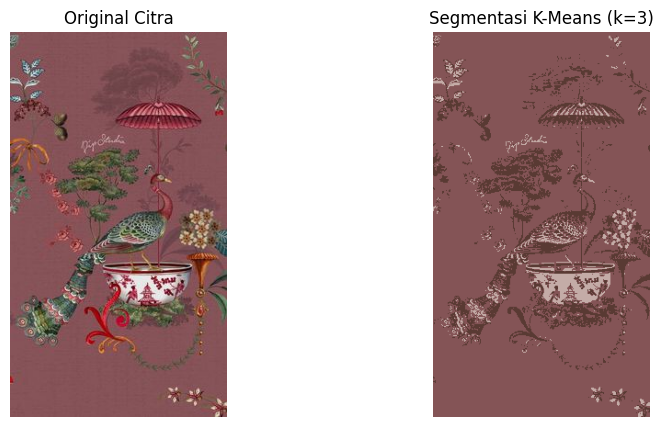

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(image)
ax[0].set_title("Original Citra")
ax[0].axis("off")

ax[1].imshow(segmented_image)
ax[1].set_title(f"Segmentasi K-Means (k={k})")
ax[1].axis("off")

plt.show()